Question 1

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('D1[1].csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544 entries, 0 to 1543
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  1544 non-null   object 
 1   global_num  975 non-null    float64
 2   date        1544 non-null   object 
 3   location    1544 non-null   object 
 4   latitude    1544 non-null   float64
 5   longitude   1544 non-null   float64
dtypes: float64(3), object(3)
memory usage: 72.5+ KB


In [3]:
df

patient_id  global_num        date                    location  \
0     P1000000501         2.0  22/04/2020       Chittorgarh_Rajasthan   
1     P1000000501         2.0  24/04/2020       Ratnagiri_Maharashtra   
2     P1000000502         5.0  26/04/2020          Pindwara_Rajasthan   
3     P1000000502         5.0  27/04/2020         Raipur_Chhattisgarh   
4     P1000000502         5.0  28/04/2020             Gokak_Karnataka   
...           ...         ...         ...                         ...   
1539  P9011000510         NaN  19/05/2020             Sagar_Karnataka   
1540  P9011000510         NaN  19/05/2020        Jorapokhar_Jharkhand   
1541  P9014000503         NaN  27/05/2020         Rewa_Madhya Pradesh   
1542  P9014000504         NaN  27/05/2020  Dharmavaram_Andhra Pradesh   
1543  P9015000503        41.0   2/12/2020         Asansol_West Bengal   

       latitude  longitude  
0     24.879999  74.629997  
1     16.994444  73.300003  
2     24.794500  73.055000  
3     21.250000  81.629997  
4     16.166700  74.833298  
...         ...        ...  
1539  14.167040  75.040298  
1540  22.422455  85.760651  
1541  24.530727  81.299110  
1542  14.413745  77.712616  
1543  23.673944  86.952393  

[1544 rows x 6 columns]

In [4]:
for col in df:
    print(df[col].nunique())

911
575
93
151
151
150


In [5]:
df['patient_id'].nunique()

911

In [6]:
df['patient_id'].value_counts()
#appears there are 2 missing patient IDs as the lenght is 911 and there 
#is meant to be 913 unque patients

P3013000501    6
P6100000519    5
P1600000501    5
P1000000531    5
P3013000502    5
              ..
P1100000564    1
P6002000514    1
P6100000523    1
P1000000997    1
P1000000510    1
Name: patient_id, Length: 911, dtype: int64

In [7]:
df['location'].nunique()

151

In [8]:
df['location'].value_counts()
#location has correct amount

Sardarshahar_Rajasthan                    134
Lucknow_Uttar Pradesh                      79
Ranebennur_Karnataka                       79
Ratnagiri_Maharashtra                      57
Kollam_Kerala                              54
                                         ... 
Bardoli_Gujarat                             1
Bihar Sharif_Bihar                          1
Sirsa_Haryana                               1
Port Blair_Andaman and Nicobar Islands      1
Burdwan_West Bengal                         1
Name: location, Length: 151, dtype: int64

In [9]:
df['global_num'].value_counts()

384.0      8
387.0      6
440.0      6
847.0      5
1710.0     5
          ..
10526.0    1
9320.0     1
8125.0     1
8601.0     1
7280.0     1
Name: global_num, Length: 575, dtype: int64

In [10]:
df.isnull().sum()
#so there is 569 nan values in global which is more then half
#so im going to drop it 

patient_id      0
global_num    569
date            0
location        0
latitude        0
longitude       0
dtype: int64

In [11]:
df = df.drop(columns=['global_num', 'latitude', 'longitude'])
df

patient_id        date                    location
0     P1000000501  22/04/2020       Chittorgarh_Rajasthan
1     P1000000501  24/04/2020       Ratnagiri_Maharashtra
2     P1000000502  26/04/2020          Pindwara_Rajasthan
3     P1000000502  27/04/2020         Raipur_Chhattisgarh
4     P1000000502  28/04/2020             Gokak_Karnataka
...           ...         ...                         ...
1539  P9011000510  19/05/2020             Sagar_Karnataka
1540  P9011000510  19/05/2020        Jorapokhar_Jharkhand
1541  P9014000503  27/05/2020         Rewa_Madhya Pradesh
1542  P9014000504  27/05/2020  Dharmavaram_Andhra Pradesh
1543  P9015000503   2/12/2020         Asansol_West Bengal

[1544 rows x 3 columns]

In [12]:
travel = df.groupby(['patient_id'])['location'].apply(list)
print(travel)

patient_id
P1000000501       [Chittorgarh_Rajasthan, Ratnagiri_Maharashtra]
P1000000502    [Pindwara_Rajasthan, Raipur_Chhattisgarh, Goka...
P1000000504                              [Lucknow_Uttar Pradesh]
P1000000505                              [Lucknow_Uttar Pradesh]
P1000000506                                        [Delhi_Delhi]
                                     ...                        
P9100000582                                      [Anand_Gujarat]
P9100000583    [Channapatna_Karnataka, Sivasagar_Assam, Jorap...
P9100000585                               [Ranaghat_West Bengal]
P9100000586                  [RL Infotechh & Solutions_Durgapur]
P9100000590             [Sardarshahar_Rajasthan, Pali_Rajasthan]
Name: location, Length: 911, dtype: object


In [13]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=05ff48d45bfe412d3cb61206f8938f397d3a394fecbdc936d02d2b4a33045de6
  Stored in directory: c:\users\n9993304\appdata\local\pip\cache\wheels\1b\02\6c\a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [14]:
#expand min support as the small precentile of people that represent the rule do not matter as the focusus is on hotspots


from apyori import apriori
# type cast the transactions from pandas into normal list format and run apriori
travel_list = list(travel)
results = list(apriori(travel_list, min_support=0.1, min_confidence = 0.1))
# print first 5 rules
print(results[:5])

# I ended up using a min_support of 0.01 and min_confidence at 0.1 because these parameters produced the least redundent rules
# with all having a lift above > 1 while still representing a percentage of the data that is meaningful.

[RelationRecord(items=frozenset({'Sardarshahar_Rajasthan'}), support=0.14709110867178923, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Sardarshahar_Rajasthan'}), confidence=0.14709110867178923, lift=1.0)])]


In [15]:
#reverse rules are still considered valid as they represent a cluster being created and then traveling, creating a cluster and
#going home

def convert_apriori_results_to_pandas_df(results):
    rules = []
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                rule_set.support, rule.confidence, rule.lift])
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support',
    'Confidence', 'Lift'])
result_df = convert_apriori_results_to_pandas_df(results)
result_df.head(10)

Left_side              Right_side   Support  Confidence  Lift
0            Sardarshahar_Rajasthan  0.147091    0.147091   1.0

In [16]:
result_df = result_df.sort_values(by='Lift', ascending=False)
result_df.head(5)

Left_side              Right_side   Support  Confidence  Lift
0            Sardarshahar_Rajasthan  0.147091    0.147091   1.0

In [17]:
#expand min support as the small precentile of people that represent the rule do not matter as the focusus is on hotspots


from apyori import apriori
# type cast the transactions from pandas into normal list format and run apriori
travel_list = list(travel)
results = list(apriori(travel_list, min_support=0.05, min_confidence = 0.1))
# print first 5 rules
print(results[:5])

# I ended up using a min_support of 0.01 and min_confidence at 0.1 because these parameters produced the least redundent rules
# with all having a lift above > 1 while still representing a percentage of the data that is meaningful.

[RelationRecord(items=frozenset({'Sardarshahar_Rajasthan'}), support=0.14709110867178923, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Sardarshahar_Rajasthan'}), confidence=0.14709110867178923, lift=1.0)])]


In [18]:
#reverse rules are still considered valid as they represent a cluster being created and then traveling, creating a cluster and
#going home

def convert_apriori_results_to_pandas_df(results):
    rules = []
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                rule_set.support, rule.confidence, rule.lift])
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support',
    'Confidence', 'Lift'])
result_df = convert_apriori_results_to_pandas_df(results)
result_df.head(10)

Left_side              Right_side   Support  Confidence  Lift
0            Sardarshahar_Rajasthan  0.147091    0.147091   1.0

In [19]:
result_df = result_df.sort_values(by='Lift', ascending=False)
result_df.head(5)

Left_side              Right_side   Support  Confidence  Lift
0            Sardarshahar_Rajasthan  0.147091    0.147091   1.0

In [20]:
from apyori import apriori
# type cast the transactions from pandas into normal list format and run apriori
travel_list = list(travel)
results = list(apriori(travel_list, min_support=0.01, min_confidence = 0.01))
# print first 5 rules
print(results[:5])

# I ended up using a min_support of 0.01 and min_confidence at 0.1 because these parameters produced the least redundent rules
# with all having a lift above > 1 while still representing a percentage of the data that is meaningful.

[RelationRecord(items=frozenset({'Alipurduar_West Bengal'}), support=0.026344676180021953, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Alipurduar_West Bengal'}), confidence=0.026344676180021953, lift=1.0)]), RelationRecord(items=frozenset({'Anand_Gujarat'}), support=0.01646542261251372, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Anand_Gujarat'}), confidence=0.01646542261251372, lift=1.0)]), RelationRecord(items=frozenset({'Asansol_West Bengal'}), support=0.018660812294182216, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Asansol_West Bengal'}), confidence=0.018660812294182216, lift=1.0)]), RelationRecord(items=frozenset({'Barh_Bihar'}), support=0.012074643249176729, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Barh_Bihar'}), confidence=0.012074643249176729, lift=1.0)]), RelationRecord(items=frozenset({'Basirhat_West Bengal'}), support

In [21]:
#reverse rules are still considered valid as they represent a cluster being created and then traveling, creating a cluster and
#going home

def convert_apriori_results_to_pandas_df(results):
    rules = []
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                rule_set.support, rule.confidence, rule.lift])
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support',
    'Confidence', 'Lift'])
result_df = convert_apriori_results_to_pandas_df(results)
result_df

Left_side                                    Right_side  \
0                                                 Alipurduar_West Bengal   
1                                                          Anand_Gujarat   
2                                                    Asansol_West Bengal   
3                                                             Barh_Bihar   
4                                                   Basirhat_West Bengal   
5                                                          Batumi_Adjara   
6                                                      Belgaum_Karnataka   
7                                              Bhimavaram_Andhra Pradesh   
8                                                       Chalakudy_Kerala   
9                                                  Channapatna_Karnataka   
10                                                      Chatrapur_Odisha   
11                                                 Chittorgarh_Rajasthan   
12                                                           Delhi_Delhi   
13                                                       Gokak_Karnataka   
14                                                        Gondal_Gujarat   
15                                                     Harihar_Karnataka   
16                                                      Hassan_Karnataka   
17                                                      Jagadhri_Haryana   
18                                             Jalgaon Jamod_Maharashtra   
19                                                Jaysingpur_Maharashtra   
20                                                  Jorapokhar_Jharkhand   
21                                                   Karaikal_Puducherry   
22                                                         Kollam_Kerala   
23                                                    Kushtagi_Karnataka   
24                                                 Lucknow_Uttar Pradesh   
25                                                 Manikchak_West Bengal   
26                                               Markapur_Andhra Pradesh   
27                                                 Medinipur_West Bengal   
28                                                     Mettur_Tamil Nadu   
29                                                    Mumbai_Maharashtra   
30                                                Nandyal_Andhra Pradesh   
31                                                    Pindwara_Rajasthan   
32                                                   Raiganj_West Bengal   
33                                                   Raipur_Chhattisgarh   
34                                                  Ramanagara_Karnataka   
35                                                  Ranaghat_West Bengal   
36                                                  Ranebennur_Karnataka   
37                                                 Ratnagiri_Maharashtra   
38                                                       Sagar_Karnataka   
39                                                Sardarshahar_Rajasthan   
40                                               Shivpuri_Madhya Pradesh   
41                                                    Sinnar_Maharashtra   
42                                                      Sirohi_Rajasthan   
43                                                 Surajpur_Chhattisgarh   
44                                                     Thiruvalla_Kerala   
45                                                       Udupi_Karnataka   
46                                                     Vasco da Gama_Goa   
47                                                      Viramgam_Gujarat   
48                            Jorapokhar_Jharkhand,Channapatna_Karnataka   
49   Channapatna_Karnataka                          Jorapokhar_Jharkhand   
50    Jorapokhar_Jharkhand                         Channapatna_Karnataka   
51                                Sardarshahar_Rajasthan,Gokak_Ka

In [27]:
result_df = result_df.sort_values(by='Lift', ascending=False)
result_df.head(5)

Left_side              Right_side   Support  Confidence  \
50    Jorapokhar_Jharkhand   Channapatna_Karnataka  0.012075    0.305556   
49   Channapatna_Karnataka    Jorapokhar_Jharkhand  0.012075    0.215686   
52         Gokak_Karnataka  Sardarshahar_Rajasthan  0.027442    0.500000   
53  Sardarshahar_Rajasthan         Gokak_Karnataka  0.027442    0.186567   
59  Sardarshahar_Rajasthan   Lucknow_Uttar Pradesh  0.018661    0.126866   

        Lift  
50  5.458061  
49  5.458061  
52  3.399254  
53  3.399254  
59  1.462970

In [ ]:
#top 5 common routes for people in Ranebeunnur in Karbatake 

In [28]:
result_df_Karbataka = result_df[result_df['Left_side'] == 'Ranebennur_Karnataka']

In [35]:
result_df_Karbataka = result_df_Karbataka.sort_values(by='Lift', ascending=False)
result_df_Karbataka.head(5)

Left_side                                         Right_side  \
3885  Ranebennur_Karnataka         Jorapokhar_Jharkhand,Ratnagiri_Maharashtra   
5534  Ranebennur_Karnataka  Ratnagiri_Maharashtra,Medinipur_West Bengal,Ch...   
5490  Ranebennur_Karnataka  Mahidpur_Madhya Pradesh,Ramanagara_Karnataka,C...   
5444  Ranebennur_Karnataka  Jorapokhar_Jharkhand,Ratnagiri_Maharashtra,Cha...   
5385  Ranebennur_Karnataka  Jorapokhar_Jharkhand,Mahidpur_Madhya Pradesh,C...   

       Support  Confidence       Lift  
3885  0.002195    0.025316  11.531646  
5534  0.001098    0.012658  11.531646  
5490  0.001098    0.012658  11.531646  
5444  0.001098    0.012658  11.531646  
5385  0.001098    0.012658  11.531646

In [31]:
#confidence levels have to lowered to produce 5 reslts for Ranebennur_Karnataka

from apyori import apriori

travel_list = list(travel)
results = list(apriori(travel_list, min_support=0.001, min_confidence = 0.001))

print(results[:5])

[RelationRecord(items=frozenset({'Alipurduar_West Bengal'}), support=0.026344676180021953, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Alipurduar_West Bengal'}), confidence=0.026344676180021953, lift=1.0)]), RelationRecord(items=frozenset({'Amalner_Maharashtra'}), support=0.0043907793633369925, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Amalner_Maharashtra'}), confidence=0.0043907793633369925, lift=1.0)]), RelationRecord(items=frozenset({'Ambernath_Maharashtra'}), support=0.006586169045005488, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Ambernath_Maharashtra'}), confidence=0.006586169045005488, lift=1.0)]), RelationRecord(items=frozenset({'Anand_Gujarat'}), support=0.01646542261251372, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Anand_Gujarat'}), confidence=0.01646542261251372, lift=1.0)]), RelationRecord(items=frozenset({'Anantnag

In [32]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                rule_set.support, rule.confidence, rule.lift])
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support',
    'Confidence', 'Lift'])
result_df = convert_apriori_results_to_pandas_df(results)
result_df

Left_side  \
0                                                         
1                                                         
2                                                         
3                                                         
4                                                         
...                                                 ...   
7036  Jorapokhar_Jharkhand,Ramanagara_Karnataka,Mahi...   
7037  Channapatna_Karnataka,Jorapokhar_Jharkhand,Mah...   
7038  Channapatna_Karnataka,Jorapokhar_Jharkhand,Ram...   
7039  Channapatna_Karnataka,Ramanagara_Karnataka,Mah...   
7040  Jorapokhar_Jharkhand,Ramanagara_Karnataka,Mahi...   

                      Right_side   Support  Confidence        Lift  
0         Alipurduar_West Bengal  0.026345    0.026345    1.000000  
1            Amalner_Maharashtra  0.004391    0.004391    1.000000  
2          Ambernath_Maharashtra  0.006586    0.006586    1.000000  
3                  Anand_Gujarat  0.016465    0.016465    1.000000  
4     Anantnag_Jammu and Kashmir  0.009879    0.009879    1.000000  
...                          ...       ...         ...         ...  
7036        Ranebennur_Karnataka  0.001098    1.000000   11.531646  
7037        Ramanagara_Karnataka  0.001098    1.000000   91.100000  
7038     Mahidpur_Madhya Pradesh  0.001098    1.000000  101.222222  
7039        Jorapokhar_Jharkhand  0.001098    1.000000   25.305556  
7040       Channapatna_Karnataka  0.001098    1.000000   17.862745  

[7041 rows x 5 columns]

In [33]:
result_df_Karbataka = result_df[result_df['Left_side'] == 'Ranebennur_Karnataka']

In [36]:
result_df_Karbataka.head(5)

Left_side                                         Right_side  \
3885  Ranebennur_Karnataka         Jorapokhar_Jharkhand,Ratnagiri_Maharashtra   
5534  Ranebennur_Karnataka  Ratnagiri_Maharashtra,Medinipur_West Bengal,Ch...   
5490  Ranebennur_Karnataka  Mahidpur_Madhya Pradesh,Ramanagara_Karnataka,C...   
5444  Ranebennur_Karnataka  Jorapokhar_Jharkhand,Ratnagiri_Maharashtra,Cha...   
5385  Ranebennur_Karnataka  Jorapokhar_Jharkhand,Mahidpur_Madhya Pradesh,C...   

       Support  Confidence       Lift  
3885  0.002195    0.025316  11.531646  
5534  0.001098    0.012658  11.531646  
5490  0.001098    0.012658  11.531646  
5444  0.001098    0.012658  11.531646  
5385  0.001098    0.012658  11.531646

In [79]:
#sequential association mining can be done because the data is ordered by date in accending order, so each travel of 
# patient is sequential. The data does not have exact time but it is assumebed that patients with travel on the same day 
#is still ordered sequentially

transactions = df.groupby(['patient_id'])['location'].apply(list)
sequences = transactions.values.tolist()

# show the first 5 sequences
print(sequences[:5])


[['Chittorgarh_Rajasthan', 'Ratnagiri_Maharashtra'], ['Pindwara_Rajasthan', 'Raipur_Chhattisgarh', 'Gokak_Karnataka'], ['Lucknow_Uttar Pradesh'], ['Lucknow_Uttar Pradesh'], ['Delhi_Delhi']]


In [80]:
from collections import defaultdict
import subprocess
import re

''' Uses SPMF to find association rules in supplied transactions '''
def get_association_rules(sequences, min_sup, min_conf):
    # step 1: create required input for SPMF
    
    # prepare a dict to uniquely assign each item in the transactions to an int ID
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1
    
    # write your sequences in SPMF format
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    # run SPMF with supplied parameters
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'spmf.jar', 'run', 'RuleGrowth', 
                     'seq_rule_input.txt', 'seq_rule_output.txt', 
                     supp_param, conf_param], shell=True)
    
    # read back the output rules
    outputs = open('seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern=r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

In [81]:
get_association_rules(sequences, 0.001, 0.01)

Left_rule  \
0                            [Chittorgarh_Rajasthan]   
1                            [Chittorgarh_Rajasthan]   
2                            [Chittorgarh_Rajasthan]   
3     [Chittorgarh_Rajasthan, Channapatna_Karnataka]   
4                            [Chittorgarh_Rajasthan]   
...                                              ...   
1751                                [Imphal_Manipur]   
1752                       [Cooch Behar_West Bengal]   
1753                              [Viramgam_Gujarat]   
1754                                    [Panaji_Goa]   
1755                                [Bodhgaya_Bihar]   

                                             Right_rule   Support  Confidence  
0                               [Ratnagiri_Maharashtra]  0.002195    0.200000  
1     [Ratnagiri_Maharashtra, Gola Gokrannath Kheri_...  0.001098    0.100000  
2                                         [Delhi_Delhi]  0.001098    0.100000  
3                                         [Delhi_Delhi]  0.001098    0.500000  
4                                     [Sagar_Karnataka]  0.001098    0.100000  
...                                                 ...       ...         ...  
1751                          [Cooch Behar_West Bengal]  0.001098    0.250000  
1752                                 [Viramgam_Gujarat]  0.001098    0.125000  
1753                          [Cooch Behar_West Bengal]  0.002195    0.142857  
1754                                    [Anand_Gujarat]  0.001098    0.125000  
1755                                     [Chabua_Assam]  0.001098    0.500000  

[1756 rows x 4 columns]

Question 2

In [7]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

# not skipping empty values, to demonstrate data preprocessing steps later
df = pd.read_csv('D2[1].csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      35335 non-null  object
 1   gender                    36183 non-null  object
 2   age                       36174 non-null  object
 3   admission_type_id         36183 non-null  int64 
 4   discharge_disposition_id  36183 non-null  int64 
 5   admission_source_id       36183 non-null  int64 
 6   time_in_hospital          36183 non-null  int64 
 7   medical_specialty         36183 non-null  object
 8   num_lab_procedures        36183 non-null  int64 
 9   num_procedures            36183 non-null  int64 
 10  num_medications           36183 non-null  int64 
 11  number_outpatient         36183 non-null  int64 
 12  number_emergency          36183 non-null  int64 
 13  number_inpatient          36183 non-null  int64 
 14  number_diagnoses      

In [8]:
df

race  gender      age  admission_type_id  \
0      Caucasian  Female  [60-70)                  2   
1      Caucasian  Female  [80-90)                  3   
2      Caucasian  Female  [80-90)                  2   
3      Caucasian  Female  [60-70)                  3   
4      Caucasian  Female  [60-70)                  3   
...          ...     ...      ...                ...   
36178  Caucasian  Female  [70-80)                  1   
36179      Other  Female      NaN                  1   
36180      Other  Female  [60-70)                  1   
36181  Caucasian  Female  [80-90)                  1   
36182  Caucasian    Male  [70-80)                  1   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
0                             1                    1                 4   
1                             2                    1                 8   
2                             1                    1                 2   
3                             1                    1                 2   
4                             2                    1                 7   
...                         ...                  ...               ...   
36178                         1                    7                 9   
36179                         1                    7                14   
36180                         1                    7                 2   
36181                         1                    7                 5   
36182                         1                    7                 6   

      medical_specialty  num_lab_procedures  num_procedures  ...  nateglinide  \
0      InternalMedicine                  43               0  ...           No   
1               Invalid                  48               6  ...           No   
2            Cardiology                  39               0  ...           No   
3               Invalid                  54               0  ...           No   
4               Invalid                  70               1  ...           No   
...                 ...                 ...             ...  ...          ...   
36178           Invalid                  50               2  ...           No   
36179           Invalid                  73               6  ...           No   
36180           Invalid                  46               6  ...           No   
36181           Invalid                  76               1  ...           No   
36182           Invalid                  13               3  ...           No   

       chlorpropamide  glimepiride  acetohexamide  glipizide glyburide  \
0                  No           No             No         No        No   
1                  No           No             No     Steady        No   
2                  No           No             No         No        No   
3                  No           No             No         No        No   
4                  No           No             No         No        No   
...               ...          ...            ...        ...       ...   
36178              No           No             No         No        Up   
36179              No           No             No     Steady        No   
36180              No           No             No         No        No   
36181              No           No             No         No        No   
36182              No           No             No         No        No   

      tolbutamide insulin change diabetesMed  
0              No  Steady  False        True  
1              No    Down   True        True  
2              No      No  False       False  
3              No      No  False       False  
4              No    Down   True        True  
...           ...     ...    ...         ...  
36178          No  Steady   True        True  
36179          No      Up   True        True  
36180          No  Steady  False        True  
36181          No      Up   True        True  
36182          No      No  False       False  

[36183 rows x 29 column

In [9]:
for col in df:
    print(df[col].unique())

['Caucasian' 'AfricanAmerican' 'Hispanic' nan 'Other' 'Asian']
['Female' 'Male' 'Unknown/Invalid']
['[60-70)' '[80-90)' '[70-80)' '[40-50)' '[50-60)' '[90-100)' '[30-40)'
 '[20-30)' '[10-20)' '[0-10)' nan]
[2 3 1 5 6 8 7 4]
[ 1  2  6  3 22 11  7 23 13  4 15  9 28  5 19  8 25 14 24 18 27]
[ 1  7  5 17  4  2  3  6  9 10 22  8 14 11 25 13]
[ 4  8  2  7  3  6  5  1 13 12 11  9 10 14]
['InternalMedicine' 'Invalid' 'Cardiology' 'Emergency/Trauma' 'Neurology'
 'Surgery-General' 'Family/GeneralPractice'
 'Surgery-Cardiovascular/Thoracic' 'Surgery-Vascular' 'Oncology'
 'Osteopath' 'Surgery-Neuro' 'Radiologist' 'Nephrology' 'Pulmonology'
 'Orthopedics-Reconstructive' 'Gastroenterology' 'Surgery-Plastic'
 'Surgery-Pediatric' 'Psychiatry' 'Orthopedics' 'Urology'
 'Surgery-Cardiovascular' 'Gynecology' 'PhysicalMedicineandRehabilitation'
 'ObstetricsandGynecology' 'Hematology/Oncology' 'Podiatry'
 'Otolaryngology' 'Surgeon' 'Pediatrics' 'Psychology' 'Hematology'
 'OutreachServices' 'Endocrinology' '

In [10]:
for col in df:
    print(df[col].value_counts())

Caucasian          27776
AfricanAmerican     5764
Hispanic             806
Other                696
Asian                293
Name: race, dtype: int64
Female             19196
Male               16984
Unknown/Invalid        3
Name: gender, dtype: int64
[70-80)     8990
[60-70)     8232
[80-90)     6386
[50-60)     6159
[40-50)     3328
[30-40)     1245
[90-100)    1072
[20-30)      561
[10-20)      179
[0-10)        22
Name: age, dtype: int64
1    20126
3     7704
2     6045
5     1103
6     1024
8      160
7       19
4        2
Name: admission_type_id, dtype: int64
1     22794
3      5023
6      4819
22      921
2       811
11      521
7       232
4       211
13      188
5       169
23      160
14      140
28       79
15       33
24       26
18       20
25       13
8         8
9         7
19        5
27        3
Name: discharge_disposition_id, dtype: int64
7     22353
1     11823
4       735
17      661
2       291
5       157
6       121
3        20
10        6
8         4
22        4

In [11]:
df['insulin'].value_counts()

No        15702
Steady    10832
Up         4894
Down       4755
Name: insulin, dtype: int64

In [12]:
df['age'].unique()

array(['[60-70)', '[80-90)', '[70-80)', '[40-50)', '[50-60)', '[90-100)',
       '[30-40)', '[20-30)', '[10-20)', '[0-10)', nan], dtype=object)

In [13]:
df['age'].value_counts()
#said age had nan in unique but none could be found
#no edits were made

[70-80)     8990
[60-70)     8232
[80-90)     6386
[50-60)     6159
[40-50)     3328
[30-40)     1245
[90-100)    1072
[20-30)      561
[10-20)      179
[0-10)        22
Name: age, dtype: int64

In [14]:
df['age'].isna().sum()

9

In [15]:
df['age'].dropna(axis=0)

0        [60-70)
1        [80-90)
2        [80-90)
3        [60-70)
4        [60-70)
          ...   
36175    [70-80)
36178    [70-80)
36180    [60-70)
36181    [80-90)
36182    [70-80)
Name: age, Length: 36174, dtype: object

In [16]:
df['chlorpropamide'].value_counts()

No        36160
Steady       14
Name: chlorpropamide, dtype: int64

In [17]:
df['chlorpropamide'].value_counts()
#same thing for chlorpromaide as there was a nan listed in the unique fucntion but none where found in the value counts
#no edits were made

No        36160
Steady       14
Name: chlorpropamide, dtype: int64

In [18]:
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [19]:
df['gender'].value_counts()

Female             19196
Male               16984
Unknown/Invalid        3
Name: gender, dtype: int64

In [20]:
indexNames = df[ df['gender'] == 'Unknown/Invalid' ].index
df.drop(indexNames , inplace=True)
#the choice to drop invalid/unknown gender was made as for one the varaible had only 4 people and two because biological
#gender is a predicting factor in diabetes making unknown/invalid an uncontrolled variable in the data

In [21]:
df['gender'].value_counts()

Female    19196
Male      16984
Name: gender, dtype: int64

In [22]:
df['age'].unique()

array(['[60-70)', '[80-90)', '[70-80)', '[40-50)', '[50-60)', '[90-100)',
       '[30-40)', '[20-30)', '[10-20)', '[0-10)', nan], dtype=object)

In [23]:
df['age'] = df['age'].fillna('[70-80)')
df['age'].unique()

array(['[60-70)', '[80-90)', '[70-80)', '[40-50)', '[50-60)', '[90-100)',
       '[30-40)', '[20-30)', '[10-20)', '[0-10)'], dtype=object)

In [24]:
age_map = {'[0-10)':0, '[10-20)':1, '[20-30)':2, '[30-40)':3, '[40-50)':4, '[50-60)':5, '[60-70)':6, '[70-80)':7,'[80-90)':8, '[90-100)':9}
df['age'] = df['age'].map(age_map)

In [25]:
df['age'].unique()

array([6, 8, 7, 4, 5, 9, 3, 2, 1, 0])

In [26]:
race_map = {'Caucasian':0, 'AfricanAmerican':1, 'Hispanic':2, 'Asian':3, 'Other':4}
df['race'] = df['race'].map(race_map)

In [27]:
df['race'].unique()

array([ 0.,  1.,  2., nan,  4.,  3.])

In [28]:
df['race'].value_counts()

0.0    27775
1.0     5764
2.0      806
4.0      696
3.0      293
Name: race, dtype: int64

In [29]:
df['race'] = df['race'].fillna(0.0)
df['race'].unique()

array([0., 1., 2., 4., 3.])

In [30]:
df['race'].unique()

array([0., 1., 2., 4., 3.])

In [31]:
gender_map = {'Female':0, 'Male':1}
df['gender'] = df['gender'].map(gender_map)

In [32]:
df['gender'].unique()

array([0, 1])

In [33]:
df['gender'] = df['gender'].fillna(0.0)
df['gender'].unique()

array([0, 1])

In [34]:
df['insulin'].unique()

array(['Steady', 'Down', 'No', 'Up'], dtype=object)

In [35]:
insulin_map = {'Steady':0, 'Down':1, 'No':2, 'Up':3}
df['insulin'] = df['insulin'].map(insulin_map)

In [36]:
df['insulin'].unique()

array([0, 1, 2, 3])

In [37]:
df['change'].unique()

array([False,  True])

In [38]:
df['change'].value_counts()

False    18102
True     18078
Name: change, dtype: int64

In [39]:
df['change'] = df['change'].astype(int)

In [40]:
df['change'].unique()

array([0, 1])

In [41]:
df['diabetesMed'].unique()

array([ True, False])

In [42]:
df['diabetesMed'] = df['diabetesMed'].astype(int)

In [43]:
df['diabetesMed'].unique()

array([1, 0])

In [44]:
df['diabetesMed'].value_counts()

1    28284
0     7896
Name: diabetesMed, dtype: int64

In [45]:
# dropping varaibles that were deemed not need for the clustering. Features were dropped if they were deemed not necessary to build a profile or they overlapped with a chosen feature.

df2 = df[['race', 'age','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient','number_emergency', 'insulin', 'diabetesMed']]

In [46]:
df2

race  age  time_in_hospital  num_lab_procedures  num_medications  \
0       0.0    6                 4                  43               13   
1       0.0    8                 8                  48               26   
2       0.0    8                 2                  39                9   
3       0.0    6                 2                  54               11   
4       0.0    6                 7                  70               20   
...     ...  ...               ...                 ...              ...   
36178   0.0    7                 9                  50               33   
36179   4.0    7                14                  73               26   
36180   4.0    6                 2                  46               17   
36181   0.0    8                 5                  76               22   
36182   0.0    7                 6                  13                3   

       number_outpatient  number_emergency  insulin  diabetesMed  
0                      1                 0        0            1  
1                      0                 0        1            1  
2                      0                 0        2            0  
3                      0                 0        2            0  
4                      1                 0        1            1  
...                  ...               ...      ...          ...  
36178                  0                 0        0            1  
36179                  0                 1        3            1  
36180                  1                 1        0            1  
36181                  0                 1        3            1  
36182                  0                 0        2            0  

[36180 rows x 9 columns]

In [47]:
for col in df2:
    print(df2[col].unique())

[0. 1. 2. 4. 3.]
[6 8 7 4 5 9 3 2 1 0]
[ 4  8  2  7  3  6  5  1 13 12 11  9 10 14]
[ 43  48  39  54  70   1  28  42  27  26  51  41  50  37  46  71  55  35
  56   4  52  31  16  45  57  64  59  33  60  53  62  30   9  38  49  29
  58   5  10   3  65  68  32  44  34  23  36  40  75  66  61  67  11  47
  22  80  12  87  76   2  69  72  63  79  77  25  14  74  81   8  21  17
  24  19  83   6  78  73  93  18  82  20 113  15  85   7  86  88  84  13
  99  95  89  91 100  94 111  92  98  96 109 114  90  97 104 105 102 101
 108 103 132 106 121 118]
[13 26  9 11 20  7 18 12  5 15 17 10 62 16 37  4  2 14  8 21 22 65 25 31
 24 19 27  6 34 33  1 28 23 53 32 64 35 55 30 29  3 47 44 69 39 38 61 42
 51 40 60 41 36 57 63 52 43 50 45 46 66 49 56 59 54 58 72 48 68 74 75 67]
[ 1  0  2  5  4  3 15  6  7 11 12 10 14  9  8 13 18 19 27 22 24 16 42 21
 36 20 26 33 17 25 23]
[ 0  2  1  3  7  5  4  8  9  6 25 10 13 11 16 37 20]
[0 1 2 3]
[1 0]


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# convert df2 to matrix
X = df2.to_numpy()
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [49]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [50]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

# list to save the clusters and cost
clusters = []
cost_vals = []
rs = 10


# this whole process should take a while
for k in range(2, 10, 2):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit_predict(X, categorical=[1])
    
    # append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)

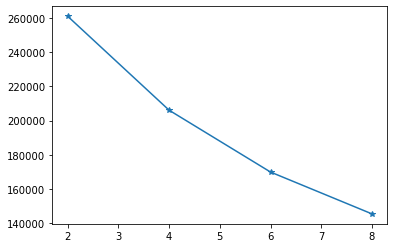

In [51]:
# plot the cost vs K values
plt.plot(range(2,10,2), cost_vals, marker='*')
plt.show()

In [52]:
X_num = [[row[0], row[2]] for row in X] # Variables of X with numeric datatype
X_cat = [[row[1]] for row in X] # variables of X with categorical datatype

In [53]:
model = clusters[1] # cluster[1] holds the K-prtotypes model with K=4

In [54]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
print("Silscore for numeric variables: " + str(silScoreNums))
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
print("Silscore for categorical variables: " + str(silScoreCats))

# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=4: " + str(silScore))

Silscore for numeric variables: 0.10523544598039714
Silscore for categorical variables: -0.02123804076504562
The avg silhouette score for k=4: 0.041998702607675756


In [55]:
from sklearn.metrics import silhouette_score
model = clusters[1]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') 
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=4: " + str(silScore))

model = clusters[2]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming')
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=6: " + str(silScore))

model = clusters[3]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') 
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=8: " + str(silScore))

The avg Silhouette score for k=4: 0.041998702607675756
The avg Silhouette score for k=6: -0.004756909125729121
The avg Silhouette score for k=8: -0.044518456360931706


Cluster membership
0    18609
3     8744
1     7256
2     1571
Name: Cluster_ID, dtype: int64


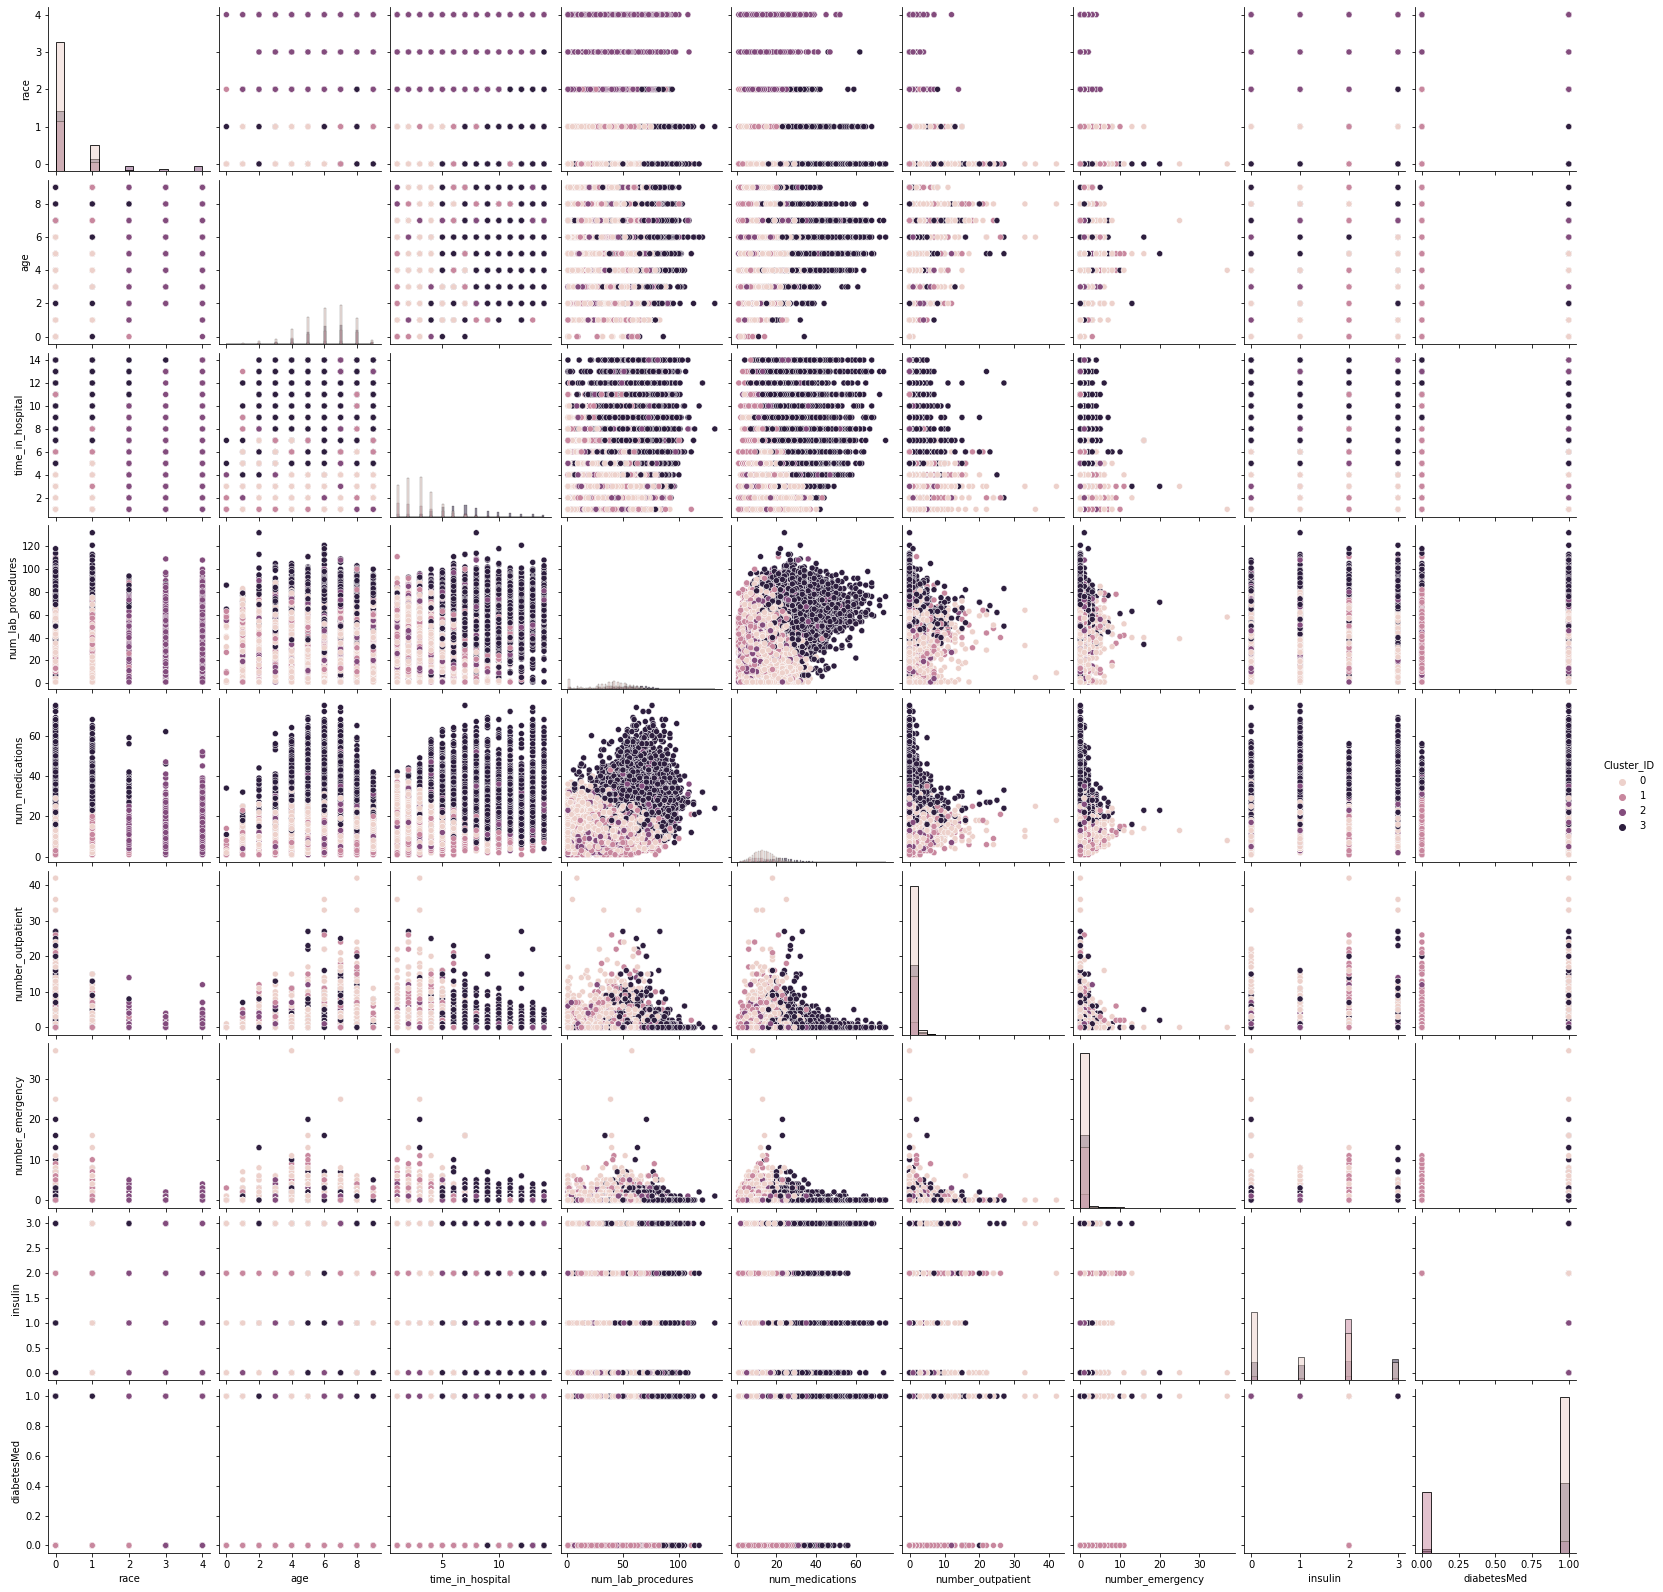

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
model = clusters[1]
y=model.fit_predict(X, categorical=[1]) 
df2['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2, hue='Cluster_ID',diag_kind='hist')
plt.show()

Distribution for cluster 0


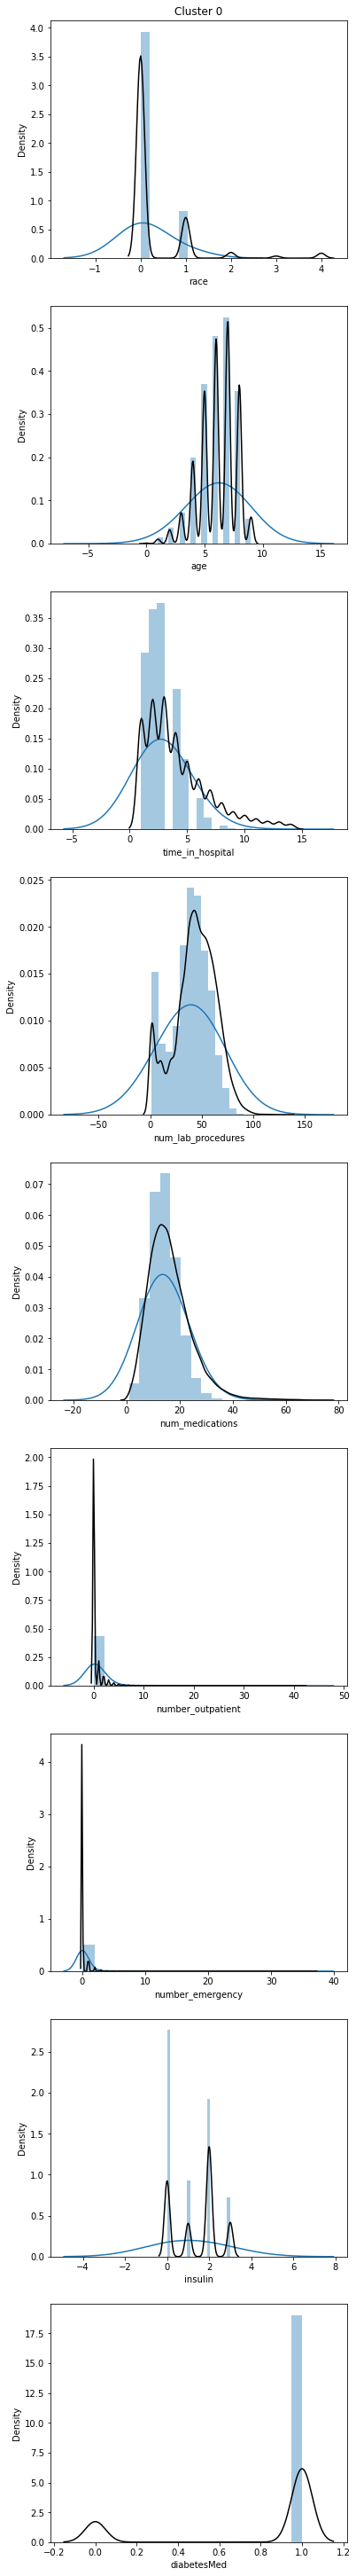

Distribution for cluster 1


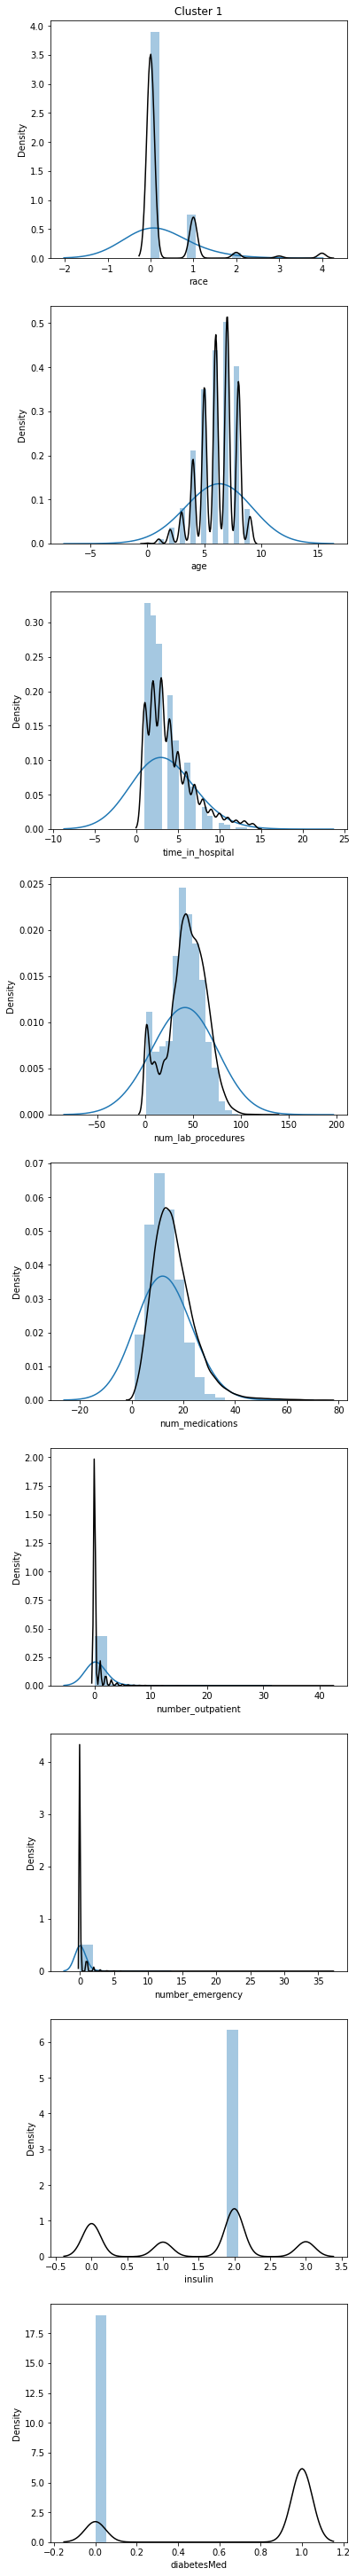

Distribution for cluster 2


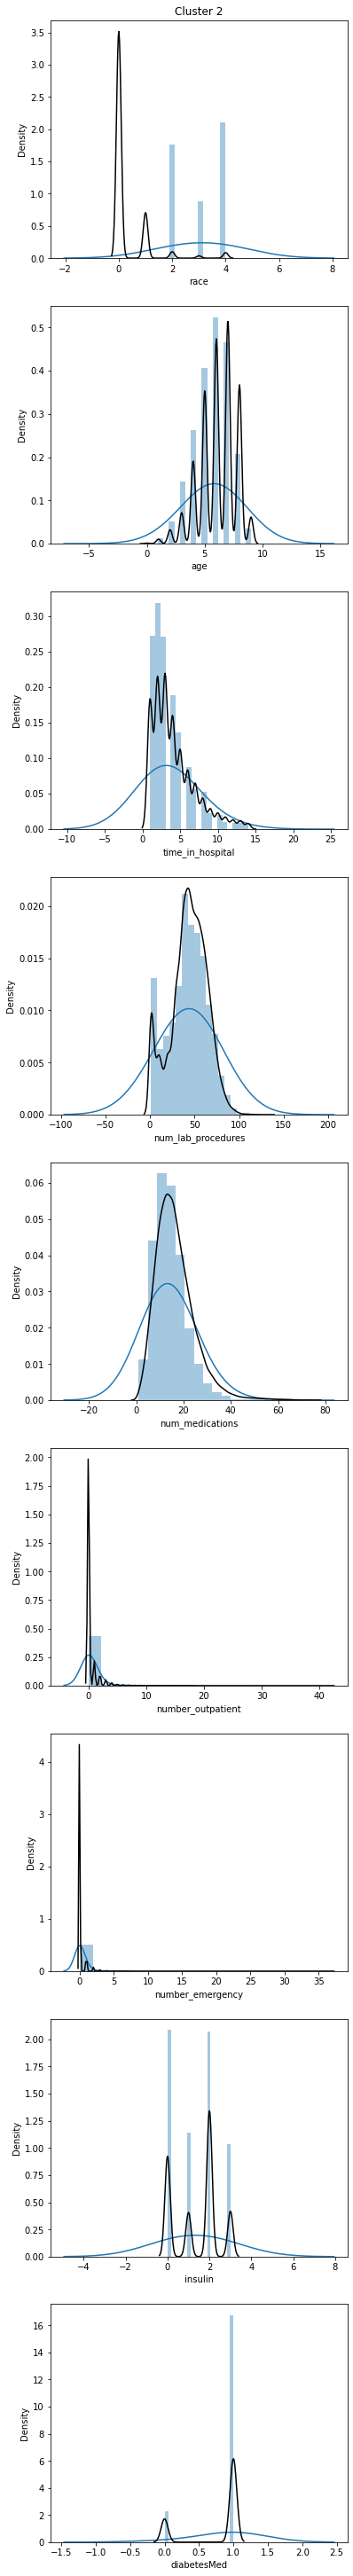

Distribution for cluster 3


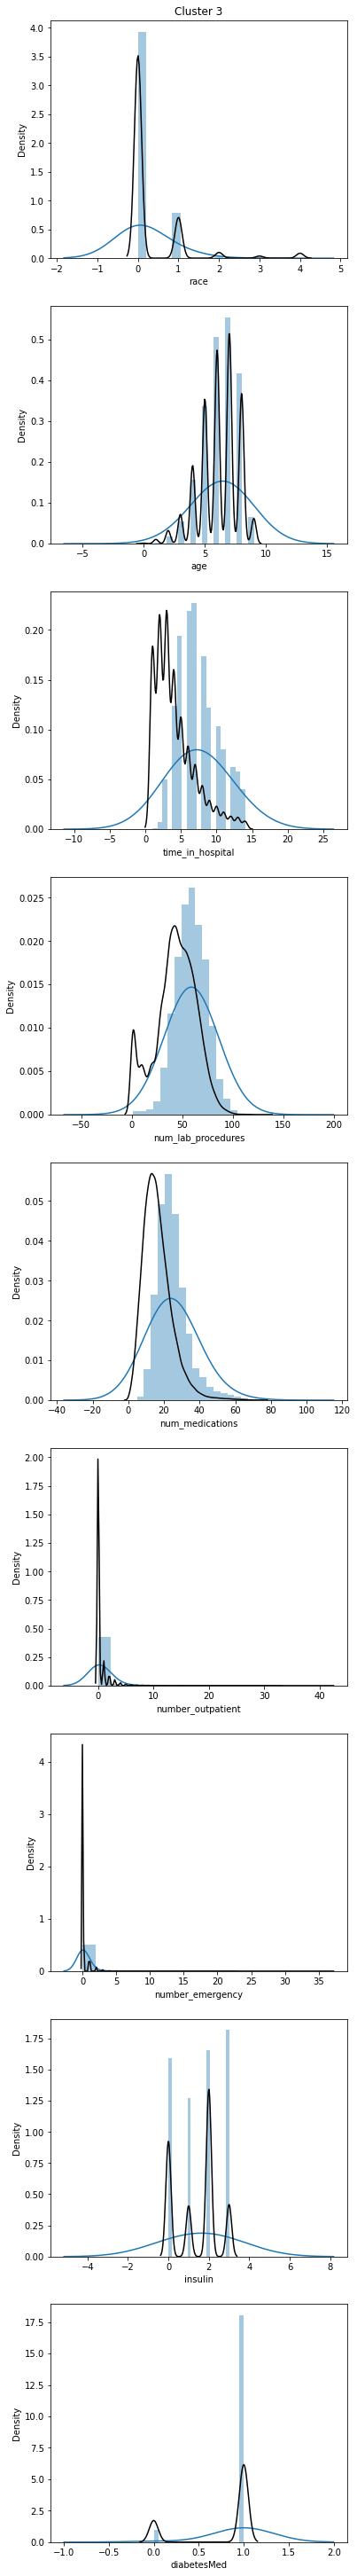

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['race', 'age','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient','number_emergency', 'insulin', 'diabetesMed']
n_bins = 20


clusters_to_inspect = [0,1,2,3]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    fig, ax = plt.subplots(nrows=9)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins,ax=ax[j], norm_hist=True, kde_kws={'bw':1.5})
        
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k" )

    
    fig.tight_layout()
    fig.subplots_adjust(top= 10)
    plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

X = df2.to_numpy()

In [61]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

# list to save the clusters and cost
clusters = []
cost_vals = []
rs = 10


# this whole process should take a while
for k in range(2, 10, 2):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit_predict(X, categorical=[1])
    
    # append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)

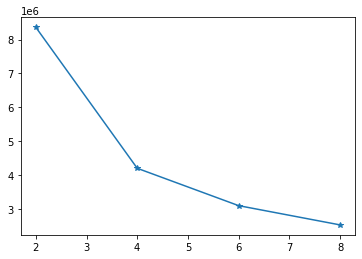

In [62]:
# plot the cost vs K values
plt.plot(range(2,10,2), cost_vals, marker='*')
plt.show()

In [63]:
X_num = [[row[0], row[2]] for row in X] # Variables of X with numeric datatype
X_cat = [[row[1]] for row in X] # variables of X with categorical datatype

In [64]:
model = clusters[1] # cluster[1] holds the K-prtotypes model with K=4

In [65]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
print("Silscore for numeric variables: " + str(silScoreNums))
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
print("Silscore for categorical variables: " + str(silScoreCats))

# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=4: " + str(silScore))

Silscore for numeric variables: -0.12357942879509688
Silscore for categorical variables: -0.013892007227537287
The avg silhouette score for k=4: -0.06873571801131709


In [66]:
from sklearn.metrics import silhouette_score
model = clusters[1]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') 
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=4: " + str(silScore))

model = clusters[2]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming')
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=6: " + str(silScore))

model = clusters[3]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') 
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=8: " + str(silScore))

The avg Silhouette score for k=4: -0.06873571801131709
The avg Silhouette score for k=6: -0.08839123311606865
The avg Silhouette score for k=8: -0.10313701714351983


Cluster membership
3    12607
2    11954
0     5999
1     5620
Name: Cluster_ID, dtype: int64


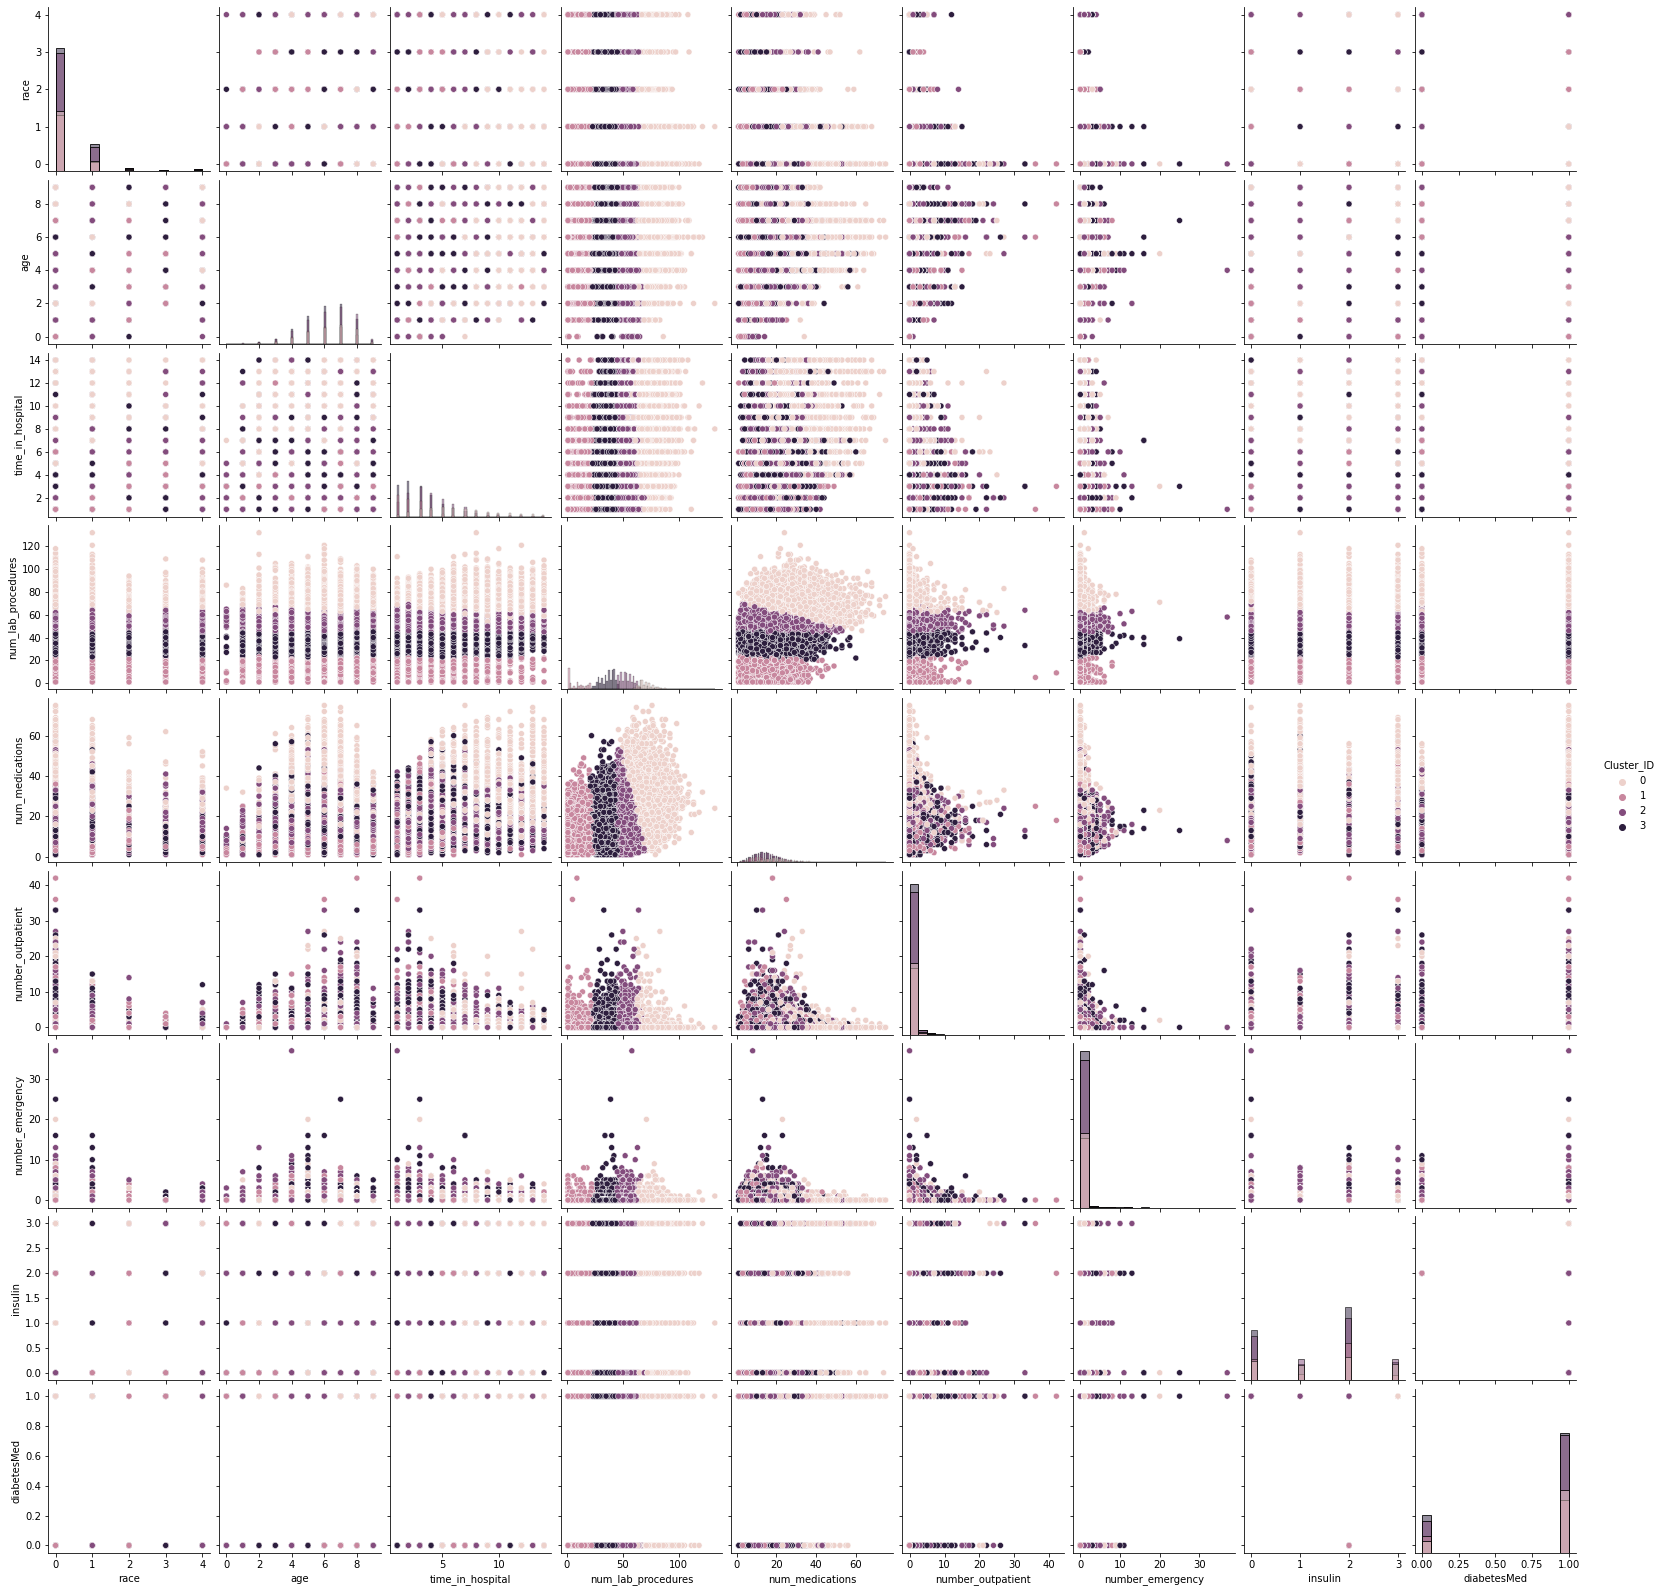

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
model = clusters[1]
y=model.fit_predict(X, categorical=[1]) 
df2['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df2, hue='Cluster_ID',diag_kind='hist')
plt.show()

Distribution for cluster 0


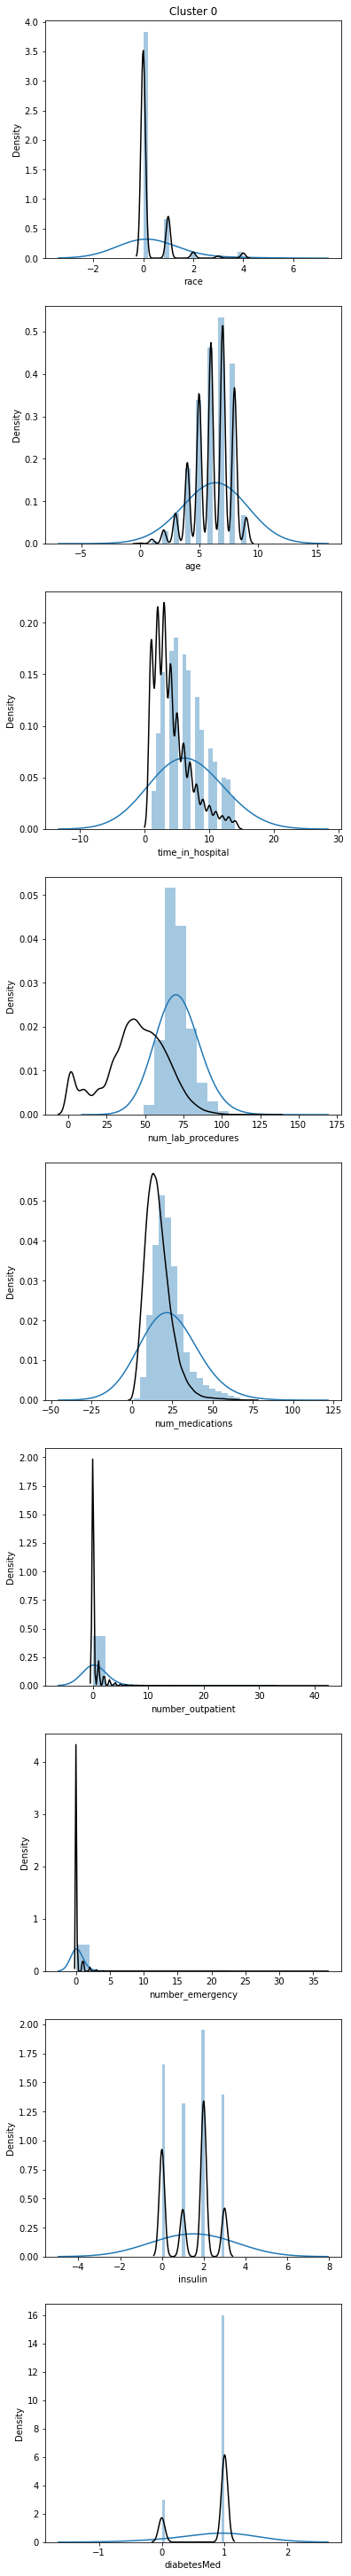

Distribution for cluster 1


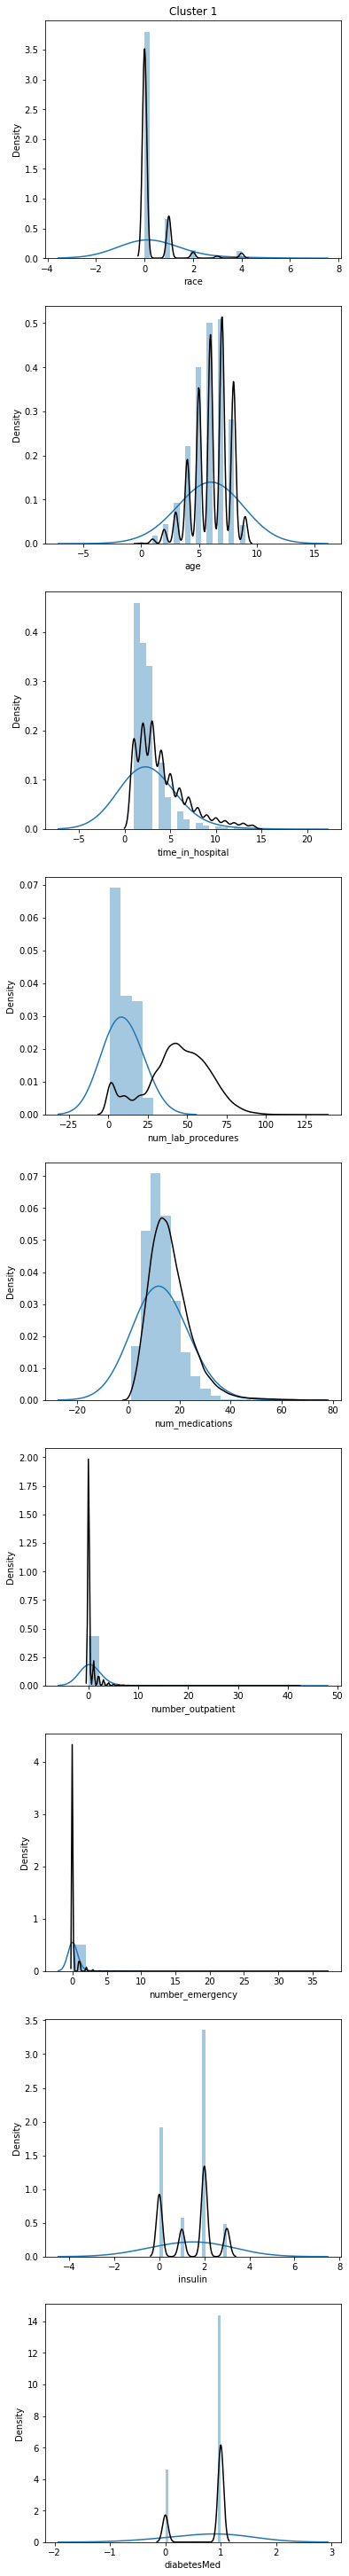

Distribution for cluster 2


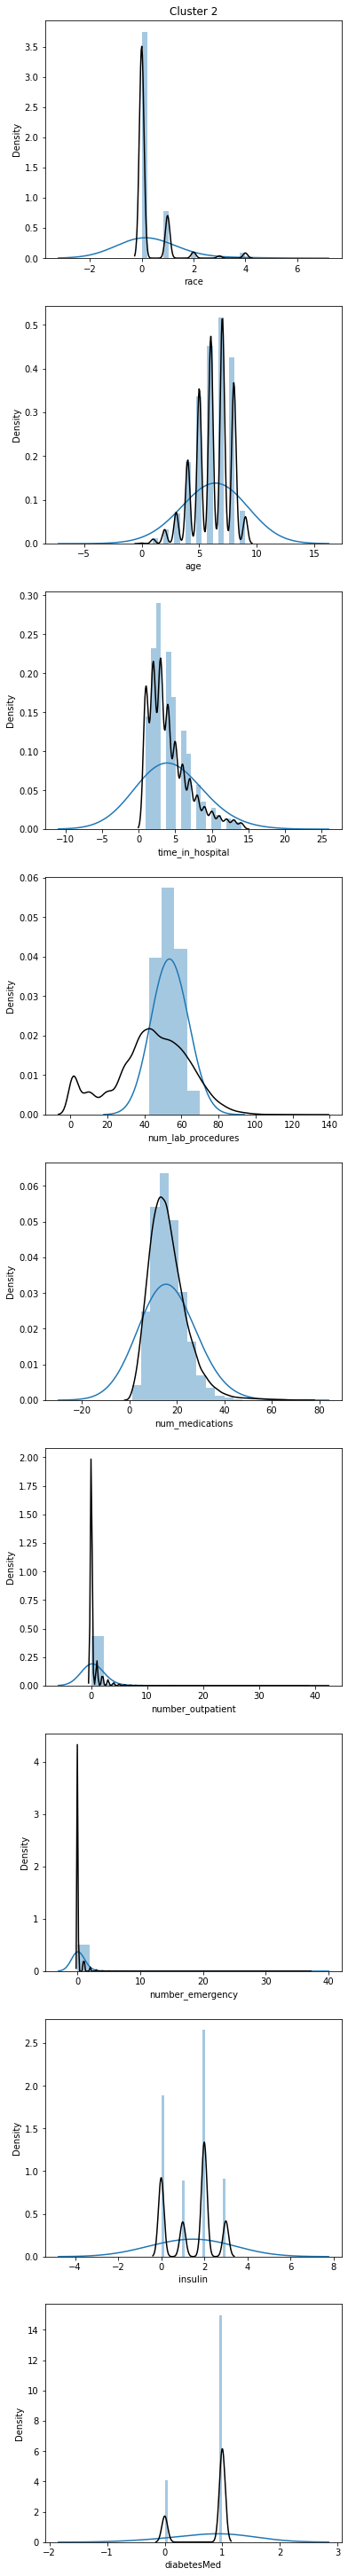

Distribution for cluster 3


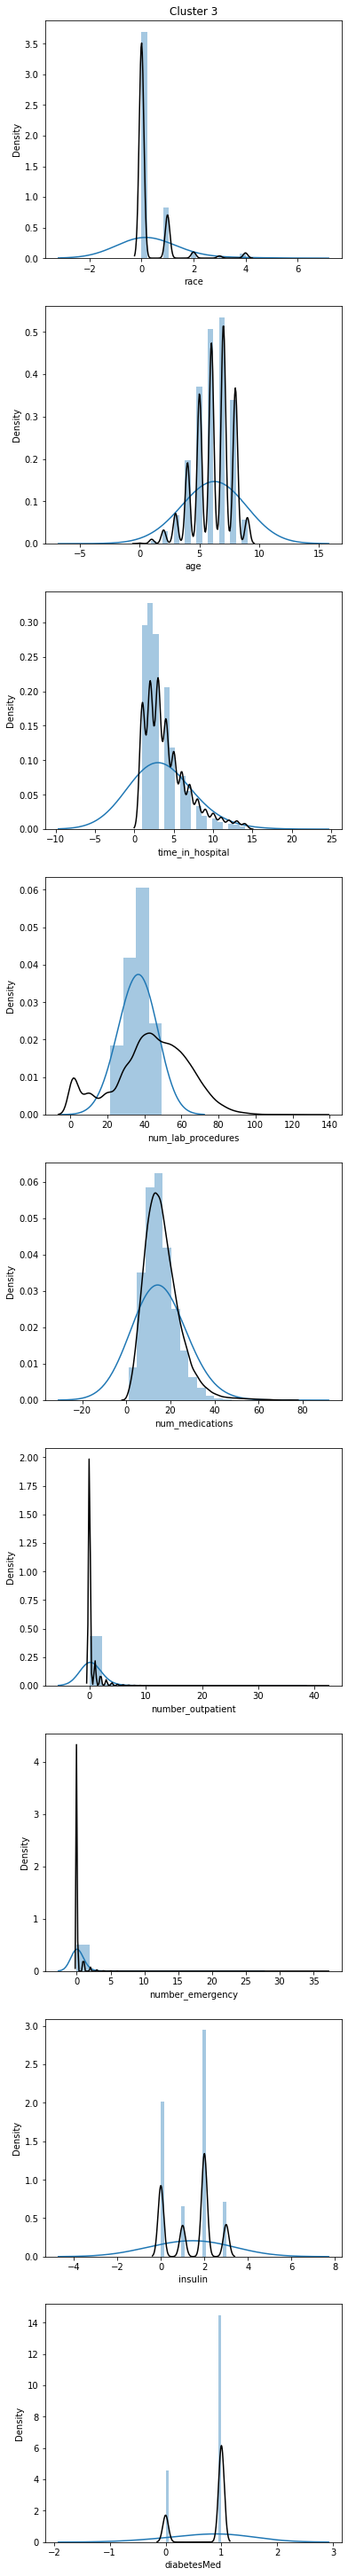

In [69]:
import pandas as pd
import numpy as np
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['race', 'age','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient','number_emergency', 'insulin', 'diabetesMed']
n_bins = 20


clusters_to_inspect = [0,1,2,3]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    fig, ax = plt.subplots(nrows=9)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        bins = np.linspace(min(df2[col]), max(df2[col]), 20)
        sns.distplot(df2[df2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde_kws={'bw':1.5})
        sns.distplot(df2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    fig.subplots_adjust(top= 10)
    plt.show()

In [114]:
# random state, we will use 42 instead of 10 for a change
rs = 10
# set the random state. different random state seeds might result in different centroids lo
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 91473.60960544476
Centroid locations:
[-0.51226631 -0.45889936 -0.05430047  0.40069202]
[0.78299588 0.77553346 0.09027619 0.5104713 ]
[-0.36555948 -0.45496313 -0.05127006 -1.64580004]


In [87]:
# list to save the clusters and cost
clusters = []
inertia_vals = []
# this whole process should take a while
for k in range(2, 15, 2):
# train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit(X)
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

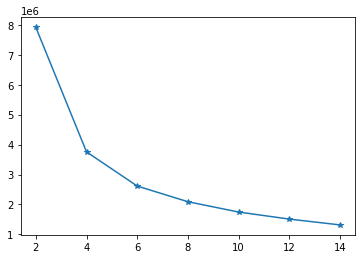

In [88]:
plt.plot(range(2,15,2), inertia_vals, marker='*')
plt.show()

Sum of intra-cluster distance: 3755998.431553804
Centroid locations:
[35.69490966 14.96815444  0.1430575   7.54690207  2.25179441]
[71.02223644 22.64949608  0.16093425  8.49528076  3.96672532]
[ 8.93920863 12.6618705   0.10629496  7.32751799  2.40863309]
[53.13291966 16.2926192   0.16394513  7.91933377  1.75481711]
Cluster membership
3    12228
0    12158
1     6230
2     5564
Name: Cluster_ID, dtype: int64


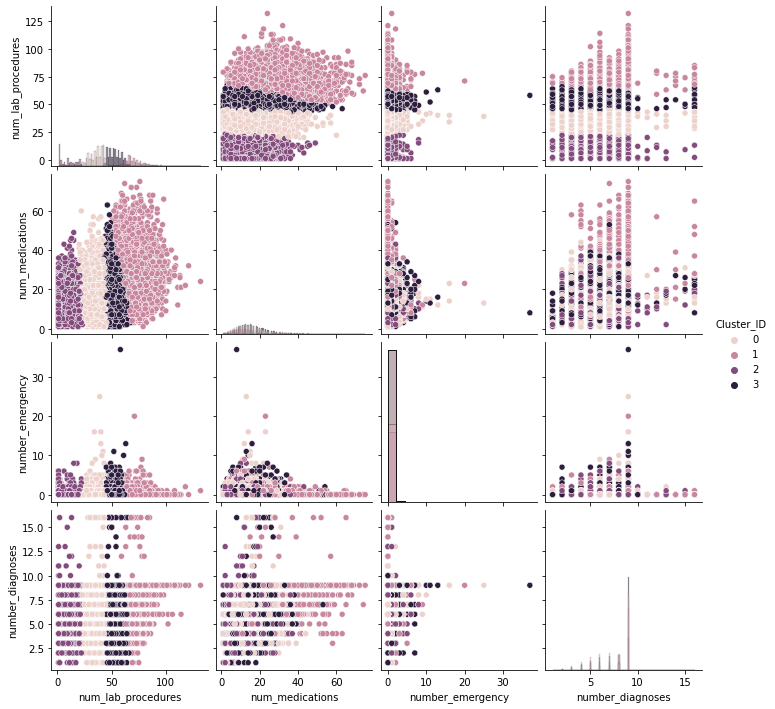

In [90]:
# visualisation of K=4 clustering solution
model = KMeans(n_clusters=4, random_state=rs)
model.fit(X)
# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)
y = model.predict(X)
df2['Cluster_ID'] = y
# how many in each
print("Cluster membership")
print(df2['Cluster_ID'].value_counts())
# pairplot
# added alpha value to assist with overlapping points
cluster_g = sns.pairplot(df2, hue='Cluster_ID', diag_kind='hist')
plt.show()

In [40]:
df['age'].unique()

array(['[60-70)', '[80-90)', '[70-80)', '[40-50)', '[50-60)', '[90-100)',
       '[30-40)', '[20-30)', '[10-20)', '[0-10)', nan], dtype=object)

In [41]:
df['age'] = df['age'].fillna('[70-80)')
df['age'].unique()

array(['[60-70)', '[80-90)', '[70-80)', '[40-50)', '[50-60)', '[90-100)',
       '[30-40)', '[20-30)', '[10-20)', '[0-10)'], dtype=object)

In [42]:
age_map = {'[0-10)':0, '[10-20)':1, '[20-30)':2, '[30-40)':3, '[40-50)':4, '[50-60)':5, '[60-70)':6, '[70-80)':7,'[80-90)':8, '[90-100)':9}
df['age'] = df['age'].map(age_map)

In [43]:
df['age'].unique()

array([6, 8, 7, 4, 5, 9, 3, 2, 1, 0], dtype=int64)

In [44]:
race_map = {'Caucasian':0, 'AfricanAmerican':1, 'Hispanic':2, 'Asian':3, 'Other':4}
df['race'] = df['race'].map(race_map)

In [45]:
df['race'].unique()

array([ 0.,  1.,  2., nan,  4.,  3.])

In [46]:
df['race'].value_counts()

0.0    27775
1.0     5764
2.0      806
4.0      696
3.0      293
Name: race, dtype: int64

In [47]:
df['race'] = df['race'].fillna(0.0)
df['race'].unique()

array([0., 1., 2., 4., 3.])

In [48]:
df['time_in_hospital'].unique()

array([ 4,  8,  2,  7,  3,  6,  5,  1, 13, 12, 11,  9, 10, 14],
      dtype=int64)

In [70]:
df3 = df[['race', 'age','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient','number_emergency', 'insulin', 'diabetesMed']]

In [71]:
indexAfrice = df3[df3['race'] == 1 ].index
df3.drop(indexAfrice, inplace=True)

In [72]:
df3['race'].unique()

array([0., 2., 4., 3.])

In [73]:
indexHispanic = df3[ df3['race'] == 2 ].index
df3.drop(indexHispanic , inplace=True)

In [74]:
df3['race'].unique()

array([0., 4., 3.])

In [75]:
indexOther = df3[ df3['race'] == 4 ].index
df3.drop(indexOther , inplace=True)

In [76]:
df3['race'].unique()

array([0., 3.])

In [88]:
from sklearn.preprocessing import StandardScaler
X = df3.to_numpy()

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [89]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [90]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [91]:
# list to save the clusters and cost
clusters = []
cost_vals = []
rs = 10


# this whole process should take a while
for k in range(2, 10, 2):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit_predict(X, categorical=[1])
    
    # append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)

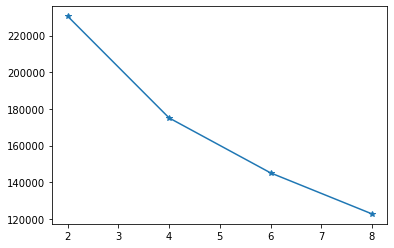

In [92]:
# plot the cost vs K values
plt.plot(range(2,10,2), cost_vals, marker='*')
plt.show()

In [93]:
X_num = [[row[0], row[2]] for row in X] # Variables of X with numeric datatype
X_cat = [[row[1]] for row in X] # variables of X with categorical datatype

In [94]:
model = clusters[1] # cluster[1] holds the K-prtotypes model with K=4

In [95]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
print("Silscore for numeric variables: " + str(silScoreNums))
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
print("Silscore for categorical variables: " + str(silScoreCats))

# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=4: " + str(silScore))

Silscore for numeric variables: 0.031245243586482202
Silscore for categorical variables: -0.028820820500131968
The avg silhouette score for k=4: 0.0012122115431751172


In [96]:
from sklearn.metrics import silhouette_score
model = clusters[1]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') 
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=4: " + str(silScore))

model = clusters[2]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming')
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=6: " + str(silScore))

model = clusters[3]
silScoreNums = silhouette_score(X_num, model.fit_predict(X,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_cat, model.fit_predict(X,categorical=[1]), metric='hamming') 
silScore = (silScoreNums + silScoreCats) / 2
print("The avg Silhouette score for k=8: " + str(silScore))

The avg Silhouette score for k=4: 0.0012122115431751172
The avg Silhouette score for k=6: -0.031091242000385245
The avg Silhouette score for k=8: -0.08800331562243163


Cluster membership
1    16488
2     6341
0     5792
3      293
Name: Cluster_ID, dtype: int64


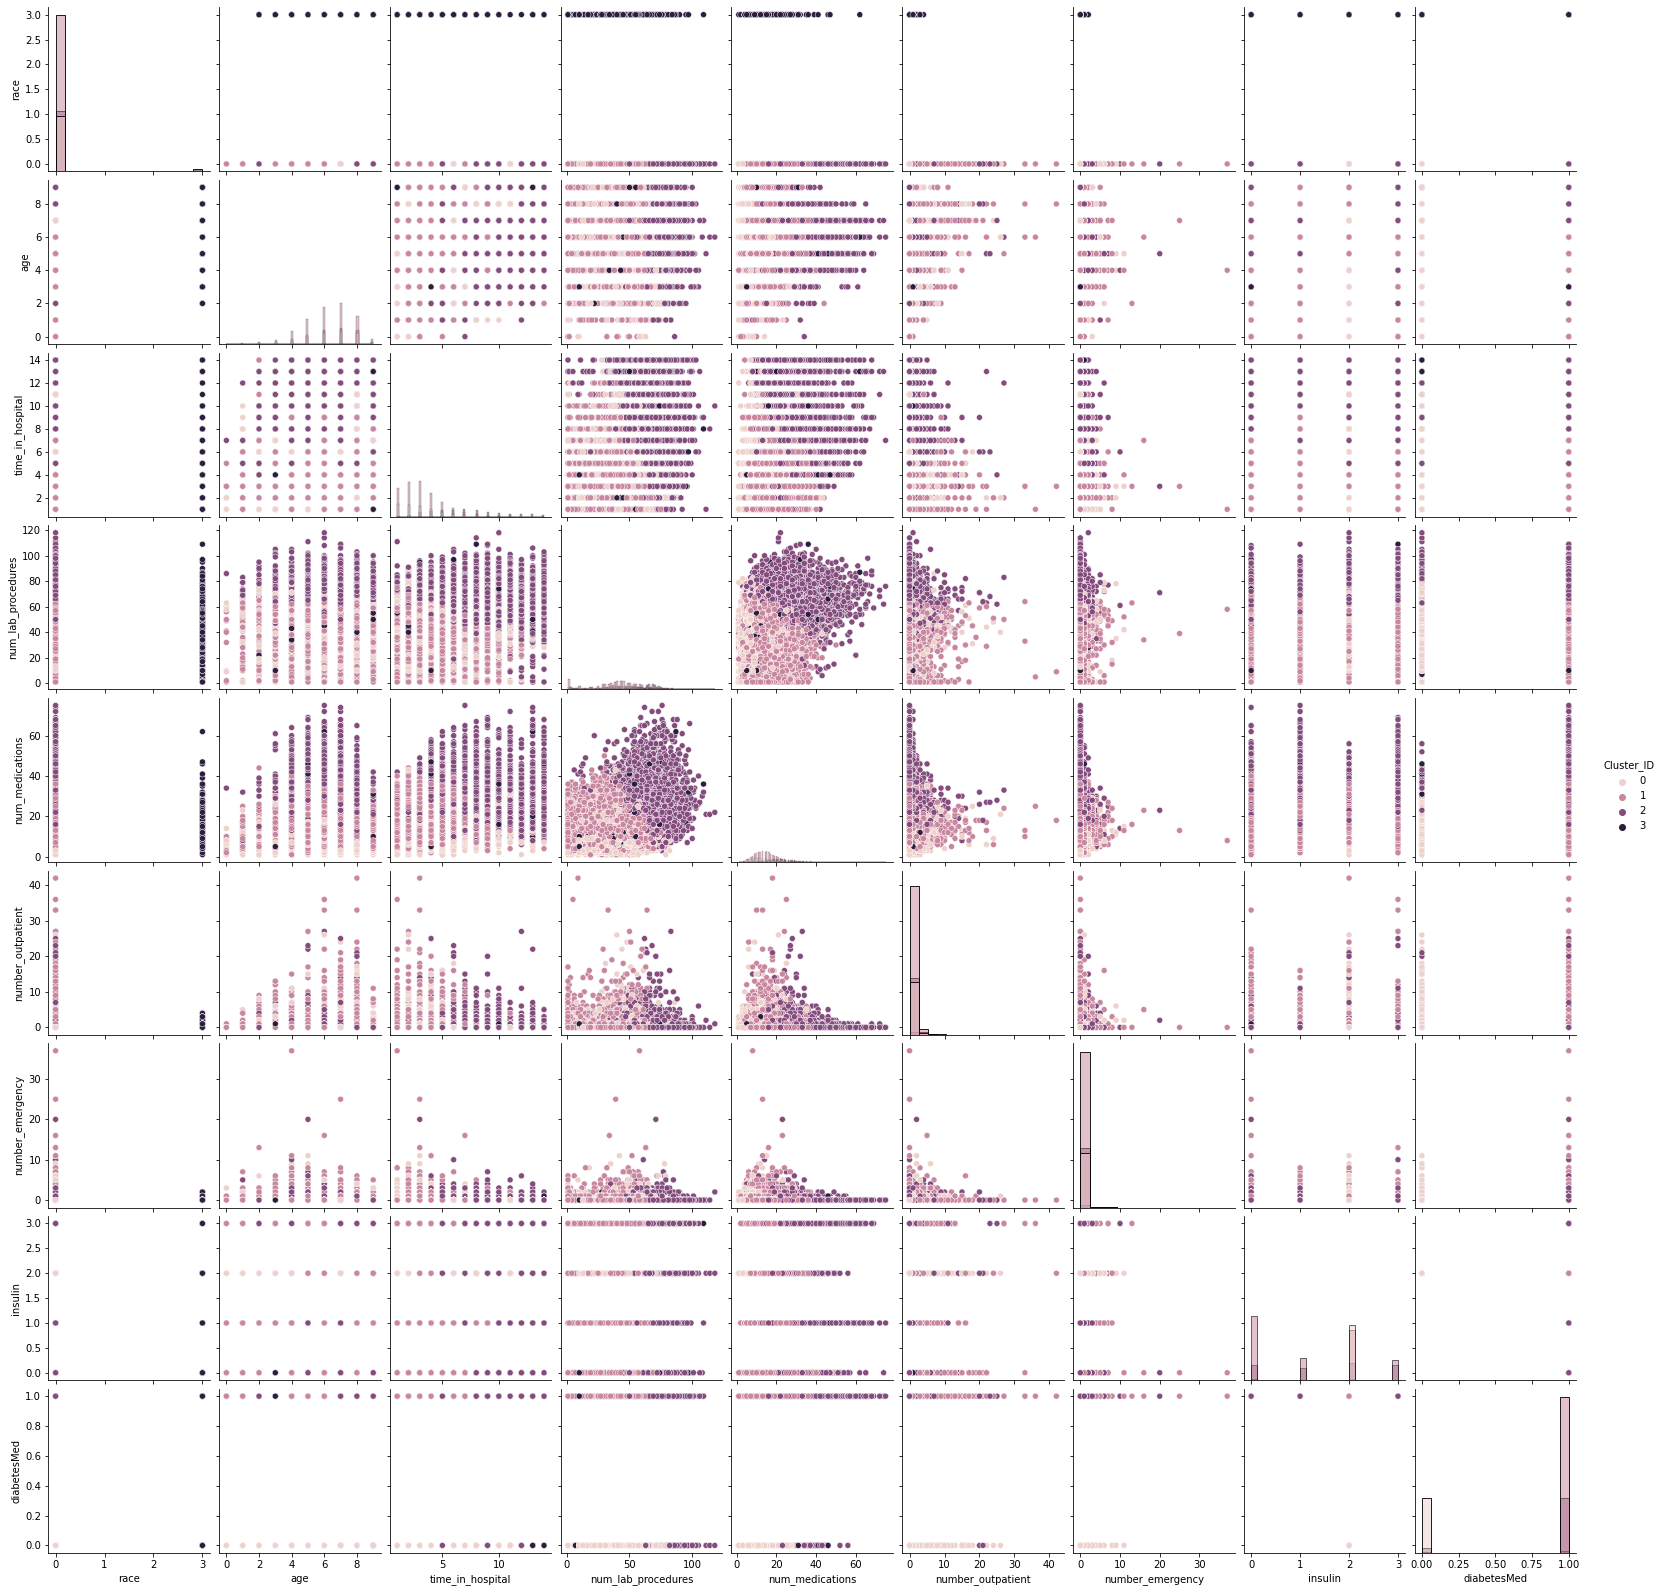

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
model = clusters[1]
y=model.fit_predict(X, categorical=[1]) 
df3['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(df3['Cluster_ID'].value_counts())
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df3, hue='Cluster_ID',diag_kind='hist')
plt.show()

Distribution for cluster 0


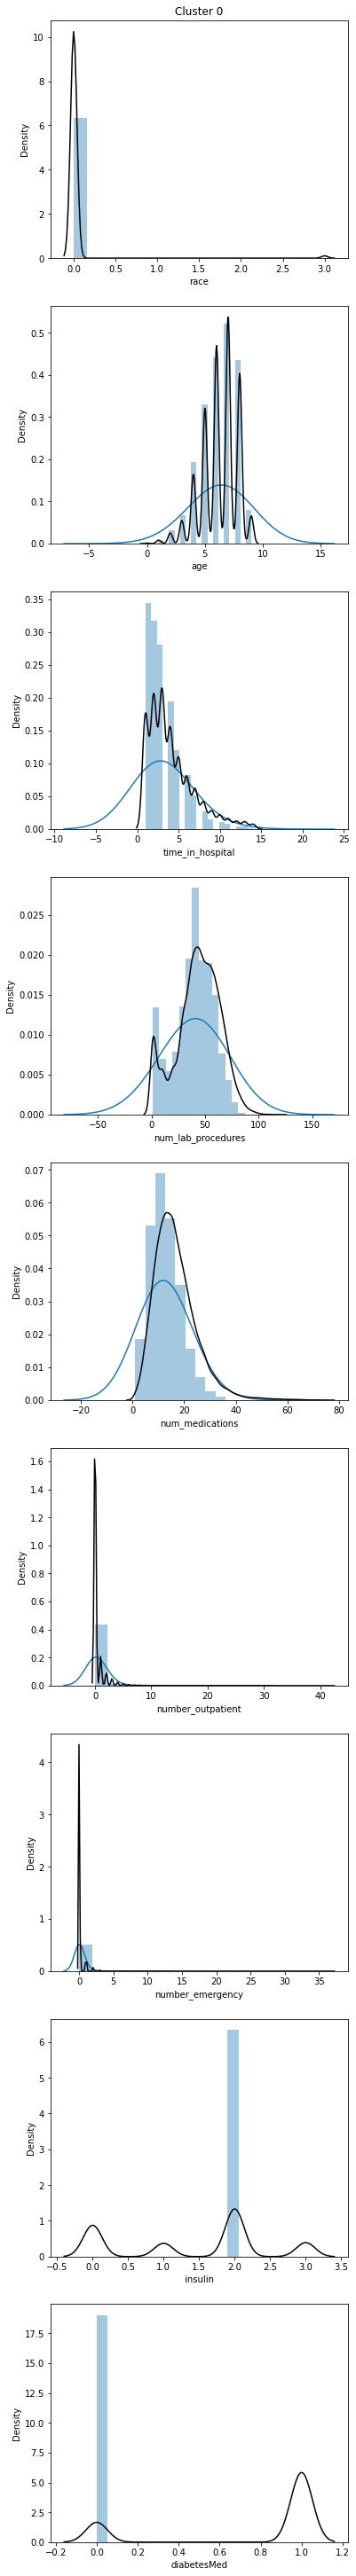

Distribution for cluster 1


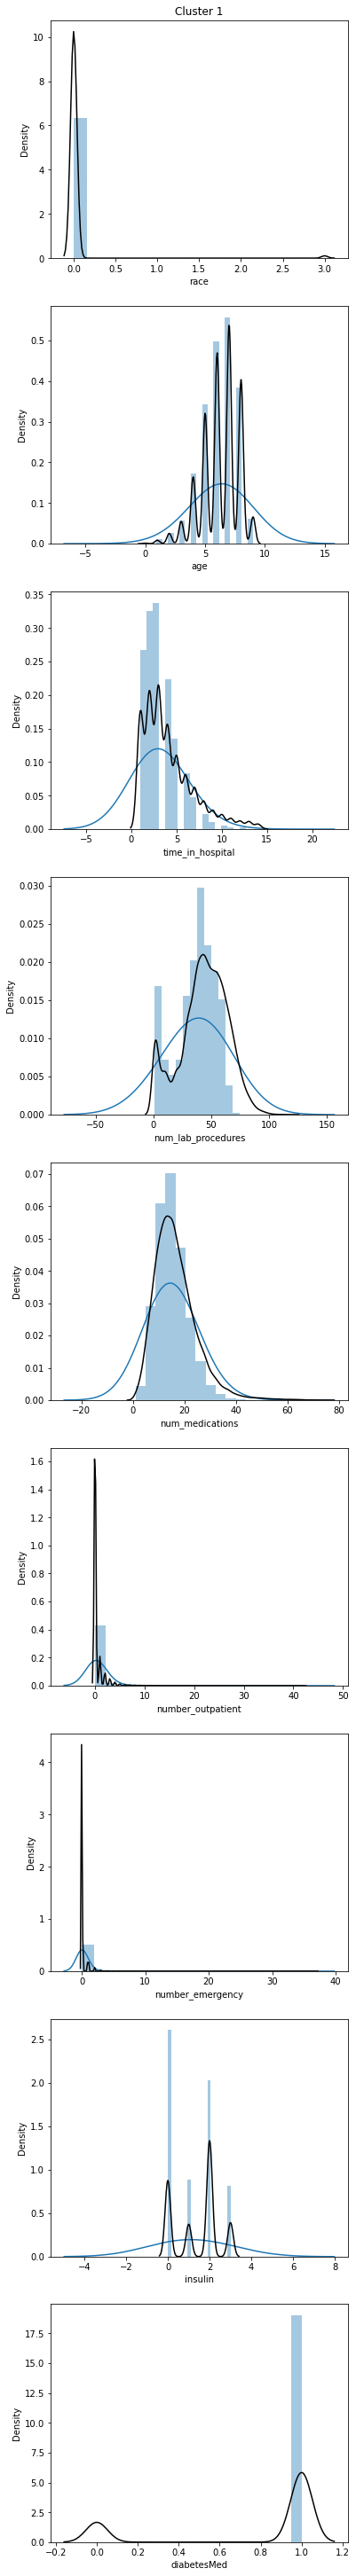

Distribution for cluster 2


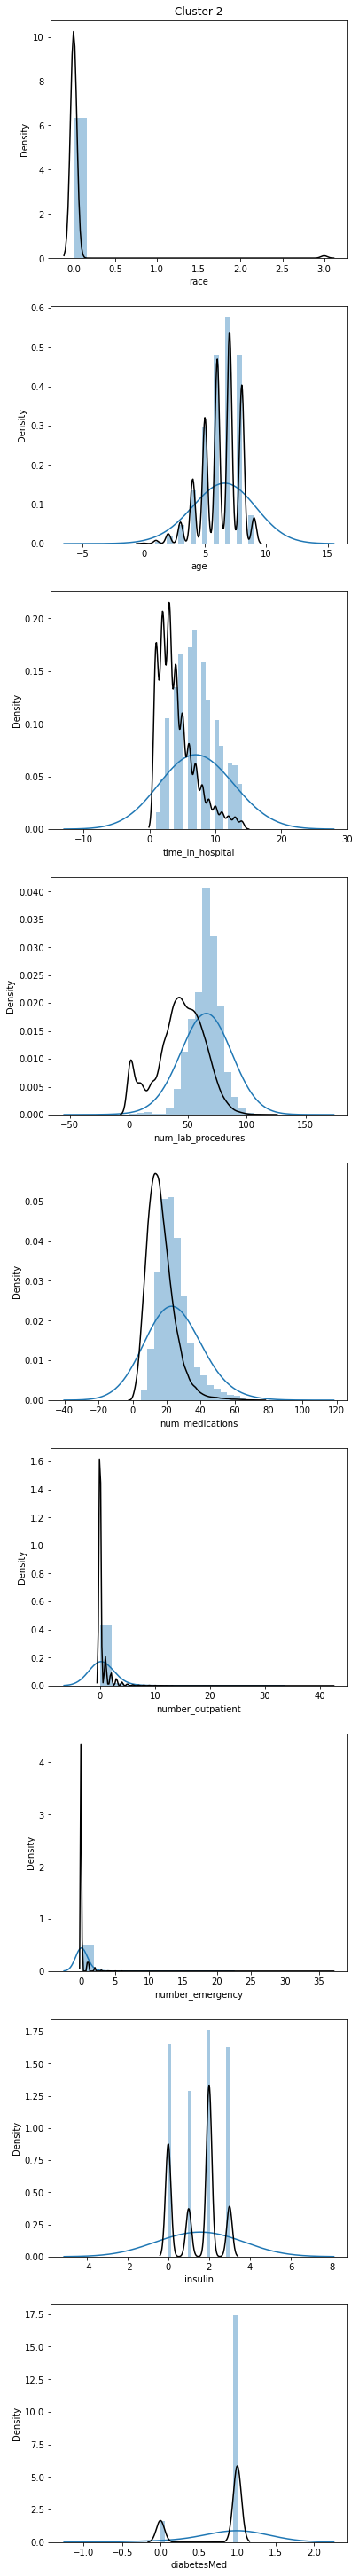

Distribution for cluster 3


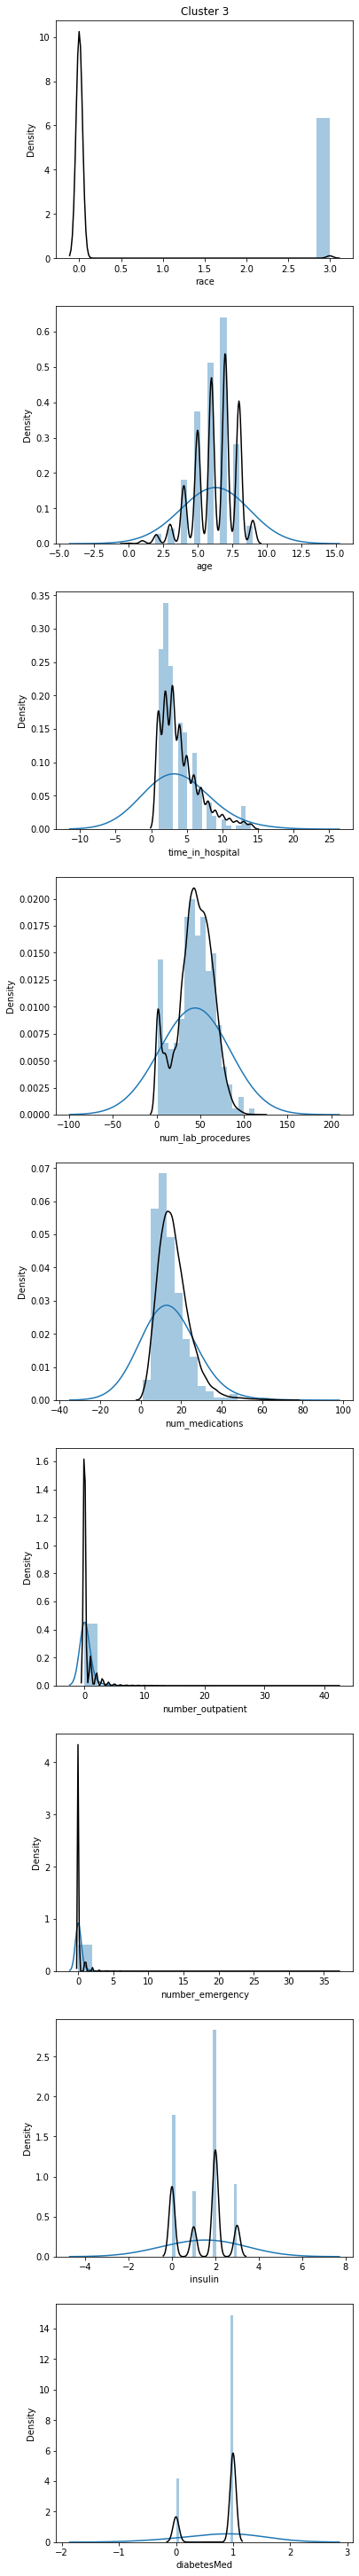

In [100]:
import pandas as pd
import numpy as np
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['race', 'age','time_in_hospital','num_lab_procedures', 'num_medications', 'number_outpatient','number_emergency', 'insulin', 'diabetesMed']
n_bins = 20


clusters_to_inspect = [0,1,2,3]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    fig, ax = plt.subplots(nrows=9)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        bins = np.linspace(min(df3[col]), max(df3[col]), 20)
        sns.distplot(df3[df3['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde_kws={'bw':1.5})
        sns.distplot(df3[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    fig.subplots_adjust(top= 10)
    plt.show()

Question 3


Question 4

Question 5